# PA 7.2

In [7]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from plotnine import *

## Cleaning from the Notes

In [8]:
ames = pd.read_csv("/Users/stolieerickson/Documents/MSBA/Fall/GSB544-Computing/InClass/Wk7/AmesHousing.csv")

# Get rid of columns with mostly NaN values
good_cols = ames.isna().sum() < 100
ames = ames.loc[:,good_cols]

## Practice Activity

Make a pipeline that uses all the variables in the Ames dataset, and then fits Ridge Regression with lambda = 1

Cross-validate this pipeline and compare the results to the ordinary linear regression.

Then fit the model on the whole dataset and get the coefficients. Make a plot of these coefficients compared to the ones from ordinary linear regression.

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


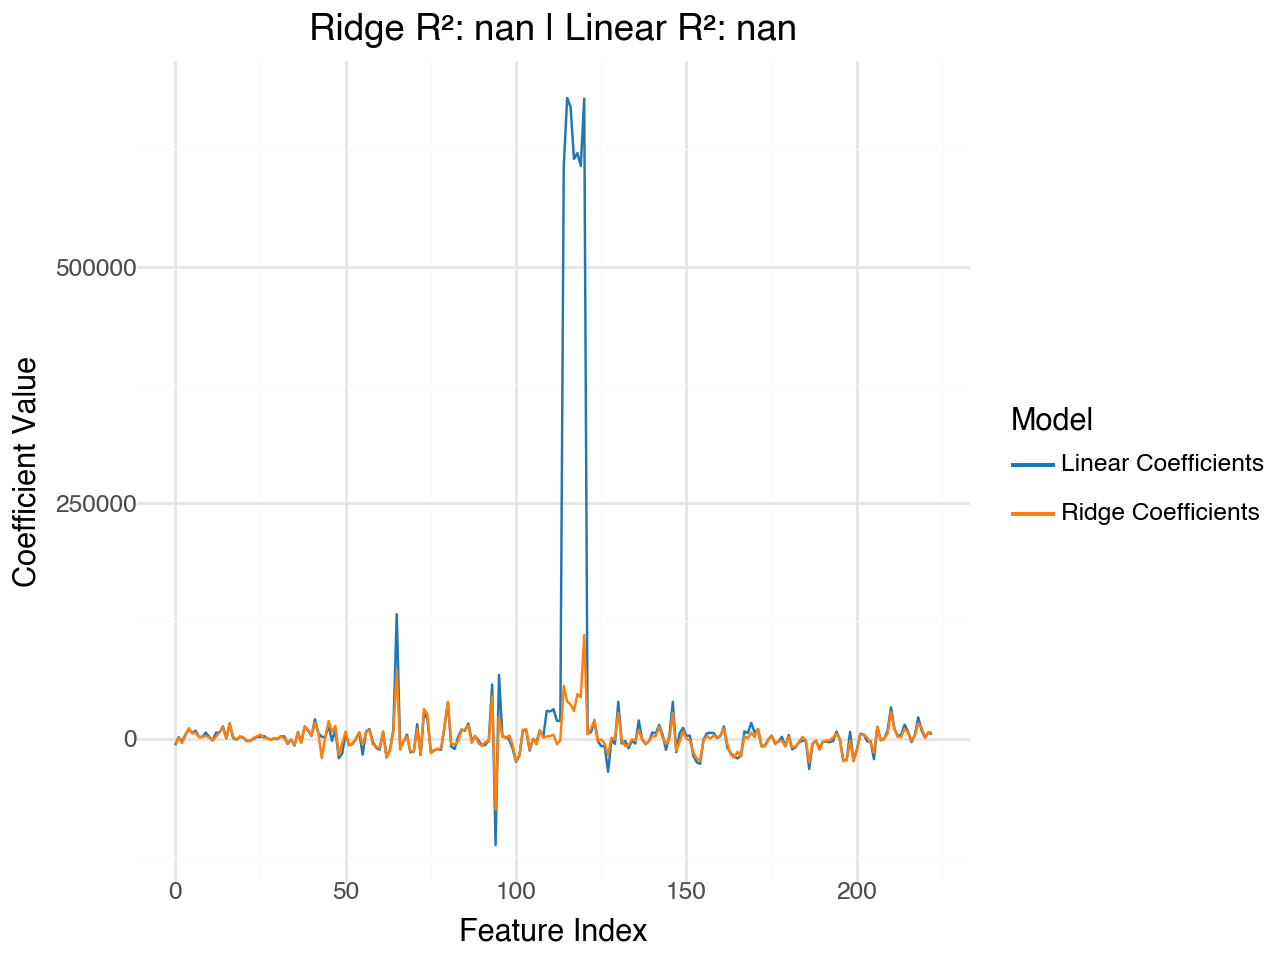

In [12]:
# Drop rows with any NaN values
ames = ames.dropna()

# Separate target variable
X, y = ames.drop(columns="SalePrice"), ames["SalePrice"]

# Preprocessor for scaling and encoding
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), X.select_dtypes(include=["number"]).columns),
    ("cat", OneHotEncoder(drop="first"), X.select_dtypes(include=["object"]).columns)
])

# Ridge and Linear pipelines
ridge_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("ridge", Ridge(alpha=1))
])

linear_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("linear", LinearRegression())
])

# Cross-validate both models
ridge_cv = cross_val_score(ridge_pipeline, X, y, cv=5, scoring="r2").mean()
linear_cv = cross_val_score(linear_pipeline, X, y, cv=5, scoring="r2").mean()

# Fit both models and extract coefficients
ridge_pipeline.fit(X, y)
linear_pipeline.fit(X, y)

# Get coefficients after preprocessing
ridge_coefs = ridge_pipeline.named_steps['ridge'].coef_
linear_coefs = linear_pipeline.named_steps['linear'].coef_

# Prepare data for plotnine
coef_data = pd.DataFrame({
    "Feature Index": np.arange(len(ridge_coefs)),
    "Ridge Coefficients": ridge_coefs,
    "Linear Coefficients": linear_coefs
}).melt(id_vars="Feature Index", var_name="Model", value_name="Coefficient")

# Plot with plotnine
plot = (
    ggplot(coef_data, aes(x="Feature Index", y="Coefficient", color="Model")) +
    geom_line() +
    labs(title=f"Ridge R²: {ridge_cv:.3f} | Linear R²: {linear_cv:.3f}",
         x="Feature Index", y="Coefficient Value") +
    theme_minimal() +
    scale_color_manual(values=["#1f77b4", "#ff7f0e"])  # Custom colors for clarity
)

## Practice Activity

Using the same pipeline as previously, perform tuning on lambda

You should always try lambda values on a log scale; that is, don’t use [1,2,3,4]; instead use something like [0.001, 0.01, 0.1, 1, 10]

## Practice Activity

Create a LASSO pipeline, and tune lambda
Fit your best model on the full Ames data, and compare the coefficients to Ridge and OLS

Warning
The sklearn function Lasso() uses the argument name alpha for lambda.

## Practice Activity

Create an Elastic Net pipeline, and tune lambda and alpha.
Fit your best model on the full Ames data, and compare the coefficients to Ridge and OLS.